In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from random import sample
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, r2_score, roc_auc_score, roc_curve, cohen_kappa_score, brier_score_loss, matthews_corrcoef
from sklearn.ensemble import AdaBoostClassifier  # Import AdaBoost

In [2]:
data = pd.read_excel("train_set.xlsx")
data

,AvgIpc,AXp-2dv,BalabanJ,BCUT2D_LOGPHI,BCUT2D_LOGPLOW,BCUT2D_MRHI,BCUT2D_MRLOW,BCUT2D_MWLOW,EState_VSA1,EState_VSA2,...,SssCH2,SssNH,SsssCH,VSA_EState10,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState7,Target
0,3.163989,0.157116,1.449389,2.482755,-2.408252,6.306887,-0.131789,9.853638,5.601051,5.907180,...,0.373034,0.000000,0.000000,6.276950,18.650156,13.261812,2.590280,-0.369007,0.000000,0
1,2.883441,0.160447,1.652336,2.307503,-2.092540,5.944275,0.579548,10.048641,0.000000,11.735769,...,0.000000,3.110822,0.171683,0.000000,4.311843,14.476227,1.174111,0.890680,0.000000,0
2,2.995063,0.170975,1.592646,2.524970,-2.633775,5.918208,-0.153498,9.604352,5.414990,12.011146,...,4.898468,0.000000,0.556180,0.000000,19.423456,1.256879,4.359456,0.344786,5.254409,1
3,3.237085,0.170348,1.250112,2.283741,-2.382656,5.983226,0.036399,10.120571,0.000000,5.907180,...,7.521040,3.112550,0.000000,0.000000,15.565646,4.198195,2.893520,1.451372,0.714509,0
4,3.105518,0.152705,1.337006,2.307991,-2.350510,5.972191,-0.137135,10.087100,11.739750,5.907180,...,4.686127,0.000000,0.000000,0.000000,18.769348,0.000000,1.458019,-0.022946,0.246286,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4352,3.223653,0.163324,1.285909,2.378509,-2.383646,9.103214,-0.115969,9.875979,6.041841,5.783245,...,2.137008,6.362370,-0.480089,3.541022,21.815457,10.879678,3.737178,0.600485,3.992494,0
4353,3.316438,0.149806,1.249631,2.375457,-2.383256,6.308889,-0.115965,9.875689,6.041841,11.797904,...,2.020692,6.272677,-0.568498,6.261511,21.666908,13.535970,3.300702,1.174778,3.523938,0
4354,2.666244,0.190936,2.167046,2.247283,-2.098512,6.042183,0.093949,9.953464,0.000000,17.619057,...,0.000000,0.000000,0.257691,0.000000,12.291485,4.511481,2.597593,0.433524,1.887222,0
4355,3.433017,0.161605,1.372329,2.303874,-2.216990,5.874067,0.060234,9.979850,11.570356,11.387856,...,1.770346,0.000000,0.000000,0.000000,16.597889,34.698562,2.590496,0.063647,1.430251,1


In [3]:
df = pd.DataFrame(data)
df.reset_index(drop=True, inplace=True)
df

,AvgIpc,AXp-2dv,BalabanJ,BCUT2D_LOGPHI,BCUT2D_LOGPLOW,BCUT2D_MRHI,BCUT2D_MRLOW,BCUT2D_MWLOW,EState_VSA1,EState_VSA2,...,SssCH2,SssNH,SsssCH,VSA_EState10,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState7,Target
0,3.163989,0.157116,1.449389,2.482755,-2.408252,6.306887,-0.131789,9.853638,5.601051,5.907180,...,0.373034,0.000000,0.000000,6.276950,18.650156,13.261812,2.590280,-0.369007,0.000000,0
1,2.883441,0.160447,1.652336,2.307503,-2.092540,5.944275,0.579548,10.048641,0.000000,11.735769,...,0.000000,3.110822,0.171683,0.000000,4.311843,14.476227,1.174111,0.890680,0.000000,0
2,2.995063,0.170975,1.592646,2.524970,-2.633775,5.918208,-0.153498,9.604352,5.414990,12.011146,...,4.898468,0.000000,0.556180,0.000000,19.423456,1.256879,4.359456,0.344786,5.254409,1
3,3.237085,0.170348,1.250112,2.283741,-2.382656,5.983226,0.036399,10.120571,0.000000,5.907180,...,7.521040,3.112550,0.000000,0.000000,15.565646,4.198195,2.893520,1.451372,0.714509,0
4,3.105518,0.152705,1.337006,2.307991,-2.350510,5.972191,-0.137135,10.087100,11.739750,5.907180,...,4.686127,0.000000,0.000000,0.000000,18.769348,0.000000,1.458019,-0.022946,0.246286,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4352,3.223653,0.163324,1.285909,2.378509,-2.383646,9.103214,-0.115969,9.875979,6.041841,5.783245,...,2.137008,6.362370,-0.480089,3.541022,21.815457,10.879678,3.737178,0.600485,3.992494,0
4353,3.316438,0.149806,1.249631,2.375457,-2.383256,6.308889,-0.115965,9.875689,6.041841,11.797904,...,2.020692,6.272677,-0.568498,6.261511,21.666908,13.535970,3.300702,1.174778,3.523938,0
4354,2.666244,0.190936,2.167046,2.247283,-2.098512,6.042183,0.093949,9.953464,0.000000,17.619057,...,0.000000,0.000000,0.257691,0.000000,12.291485,4.511481,2.597593,0.433524,1.887222,0
4355,3.433017,0.161605,1.372329,2.303874,-2.216990,5.874067,0.060234,9.979850,11.570356,11.387856,...,1.770346,0.000000,0.000000,0.000000,16.597889,34.698562,2.590496,0.063647,1.430251,1


In [4]:
y_train = df.Target
x_train = df.drop('Target', axis=1)


In [5]:
x_train = x_train.T
y_train = y_train.T


# TRAIN SET ACCURACY

In [9]:
from sklearn.ensemble import AdaBoostClassifier

# Parameters for AdaBoost
adaboost = AdaBoostClassifier(
    n_estimators=3000,
    learning_rate=0.001,
    random_state=42
)

# Train the AdaBoost classifier
adaboost.fit(x_train.T, y_train.T)

# Calculate training accuracy
acc_train = adaboost.score(x_train.T, y_train.T) * 100
print(acc_train)


C:\Users\Dell\.conda\envs\Compound_Library\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


76.49759008492082


In [31]:
from sklearn.metrics import RocCurveDisplay

from numpy import interp
from sklearn.metrics import roc_curve,auc
cv = StratifiedKFold(n_splits=10,shuffle=False)

C:\Users\Dell\.conda\envs\Compound_Library\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Dell\.conda\envs\Compound_Library\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Dell\.conda\envs\Compound_Library\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Dell\.conda\envs\Compound_Library\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the S

<Figure size 4200x3000 with 0 Axes>

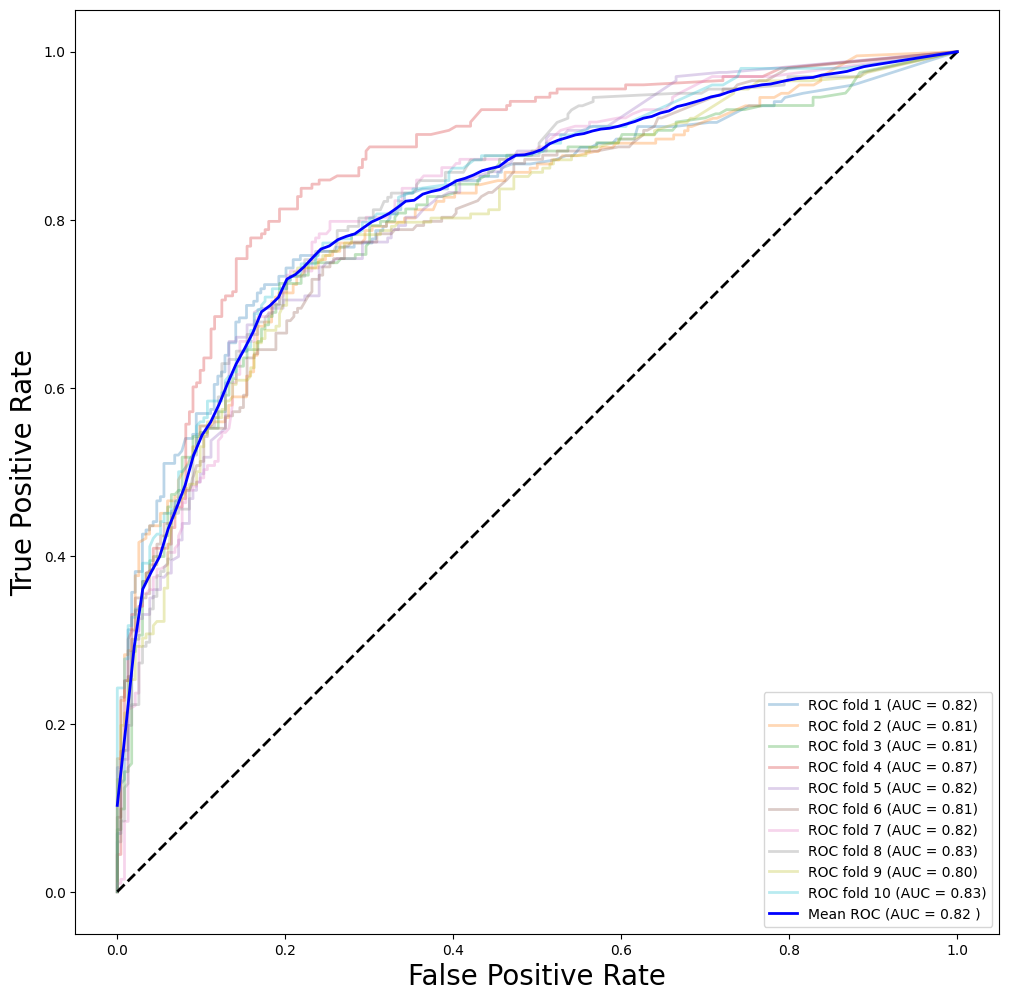

In [32]:
# plot k fold ROC
plt.figure(figsize=(7, 5), dpi=600)
x_train = x_train.T
fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x_train,y_train):
    prediction = adaboost.fit(x_train.iloc[train],y_train.iloc[train]).predict_proba(x_train.iloc[test])
    fpr, tpr, t = roc_curve(y_train.iloc[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.legend(loc="lower right")
plt.savefig('CrossVal-ADA.png', dpi=600, bbox_inches='tight')
plt.show()

# TESTING SET

In [11]:
v_test_data = pd.read_excel("test_set.xlsx")
v_test_data = pd.DataFrame(v_test_data)
v_test_data.shape

(1090, 57)

In [12]:
Y_v_test_data = v_test_data.Target
X_v_test_data = v_test_data.drop('Target', axis=1)

In [13]:
v_predictions = adaboost.predict(X_v_test_data)
v_acc_test = adaboost.score(X_v_test_data, Y_v_test_data)*100
print(v_acc_test)

75.59633027522936


In [15]:
# performance metrics to calculate
from sklearn.metrics import matthews_corrcoef
print('Accuracy:%0.3f'% v_acc_test)
tn, fp, fn, tp = confusion_matrix(Y_v_test_data, v_predictions).ravel()
specificity = tn / (tn+fp)
sensitivity = tp / (tp+fn)
print('Sensitivity:%0.3f'% sensitivity)
print('Specificity:%0.3f'% specificity)
ba = 0.5 * (sensitivity + specificity)
print('Balance accuracy:%0.3f'% ba)
mcc = matthews_corrcoef(Y_v_test_data, v_predictions)
print('MCC: %0.3f'% mcc)
bloss = brier_score_loss(Y_v_test_data, v_predictions)
print('Brier_loss: %0.3f' % bloss)
FPR = fp/(fp+tn)
FNR = fn/(tp+fn)
Precision = tp/(tp+fp)
Recall = tp/(tp+fn)
print('False Postive rate: %0.3f' %FPR)
print('False Negative rate: %0.3f' %FNR)
print('Precision: %0.3f' %Precision)
print('Recall: %0.3f' %Recall)
f1=2*((Precision*Recall)/(Precision+Recall))
print('F1: %0.3f' %f1)
kappa = cohen_kappa_score(Y_v_test_data, v_predictions)
print('Kappa: %0.3f' %kappa)

Accuracy:75.596
Sensitivity:0.659
Specificity:0.840
Balance accuracy:0.750
MCC: 0.510
Brier_loss: 0.244
False Postive rate: 0.160
False Negative rate: 0.341
Precision: 0.782
Recall: 0.659
F1: 0.715
Kappa: 0.504


In [16]:
r_auc_score = roc_auc_score(Y_v_test_data, v_predictions)
print('AUC: %0.3f' % r_auc_score)

AUC: 0.750


In [17]:
# confusion matrix
cf =(confusion_matrix(Y_v_test_data, v_predictions))
print(classification_report(Y_v_test_data, v_predictions))

              precision    recall  f1-score   support

           0       0.74      0.84      0.79       583
           1       0.78      0.66      0.72       507

    accuracy                           0.76      1090
   macro avg       0.76      0.75      0.75      1090
weighted avg       0.76      0.76      0.75      1090



<Axes: xlabel='Predicted Value', ylabel='True Value'>

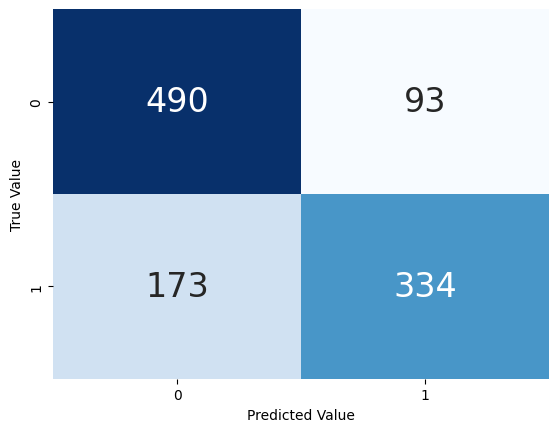

In [18]:
cf_plt =sns.heatmap(cf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
cf_plt.set(xlabel = "Predicted Value", ylabel ="True Value")
cf_plt

In [19]:
fig = cf_plt.get_figure()
fig.savefig("ADA_Con_mat.png")

In [20]:
# ROC - AUC curve 
r_probs = [0 for _ in range(len(Y_v_test_data))]

adaboost_prob = adaboost.predict_proba(X_v_test_data)

adaboost_prob = adaboost_prob[:,1]
#xgb_prob

In [21]:
r_auc_score = roc_auc_score(Y_v_test_data, adaboost_prob)
r_auc_score_1 = roc_auc_score(Y_v_test_data,r_probs)
print(r_auc_score)
fpr, tpr, _ = roc_curve(Y_v_test_data, adaboost_prob)
rfpr, rtpr, _ = roc_curve(Y_v_test_data, r_probs)

0.8184541631566306


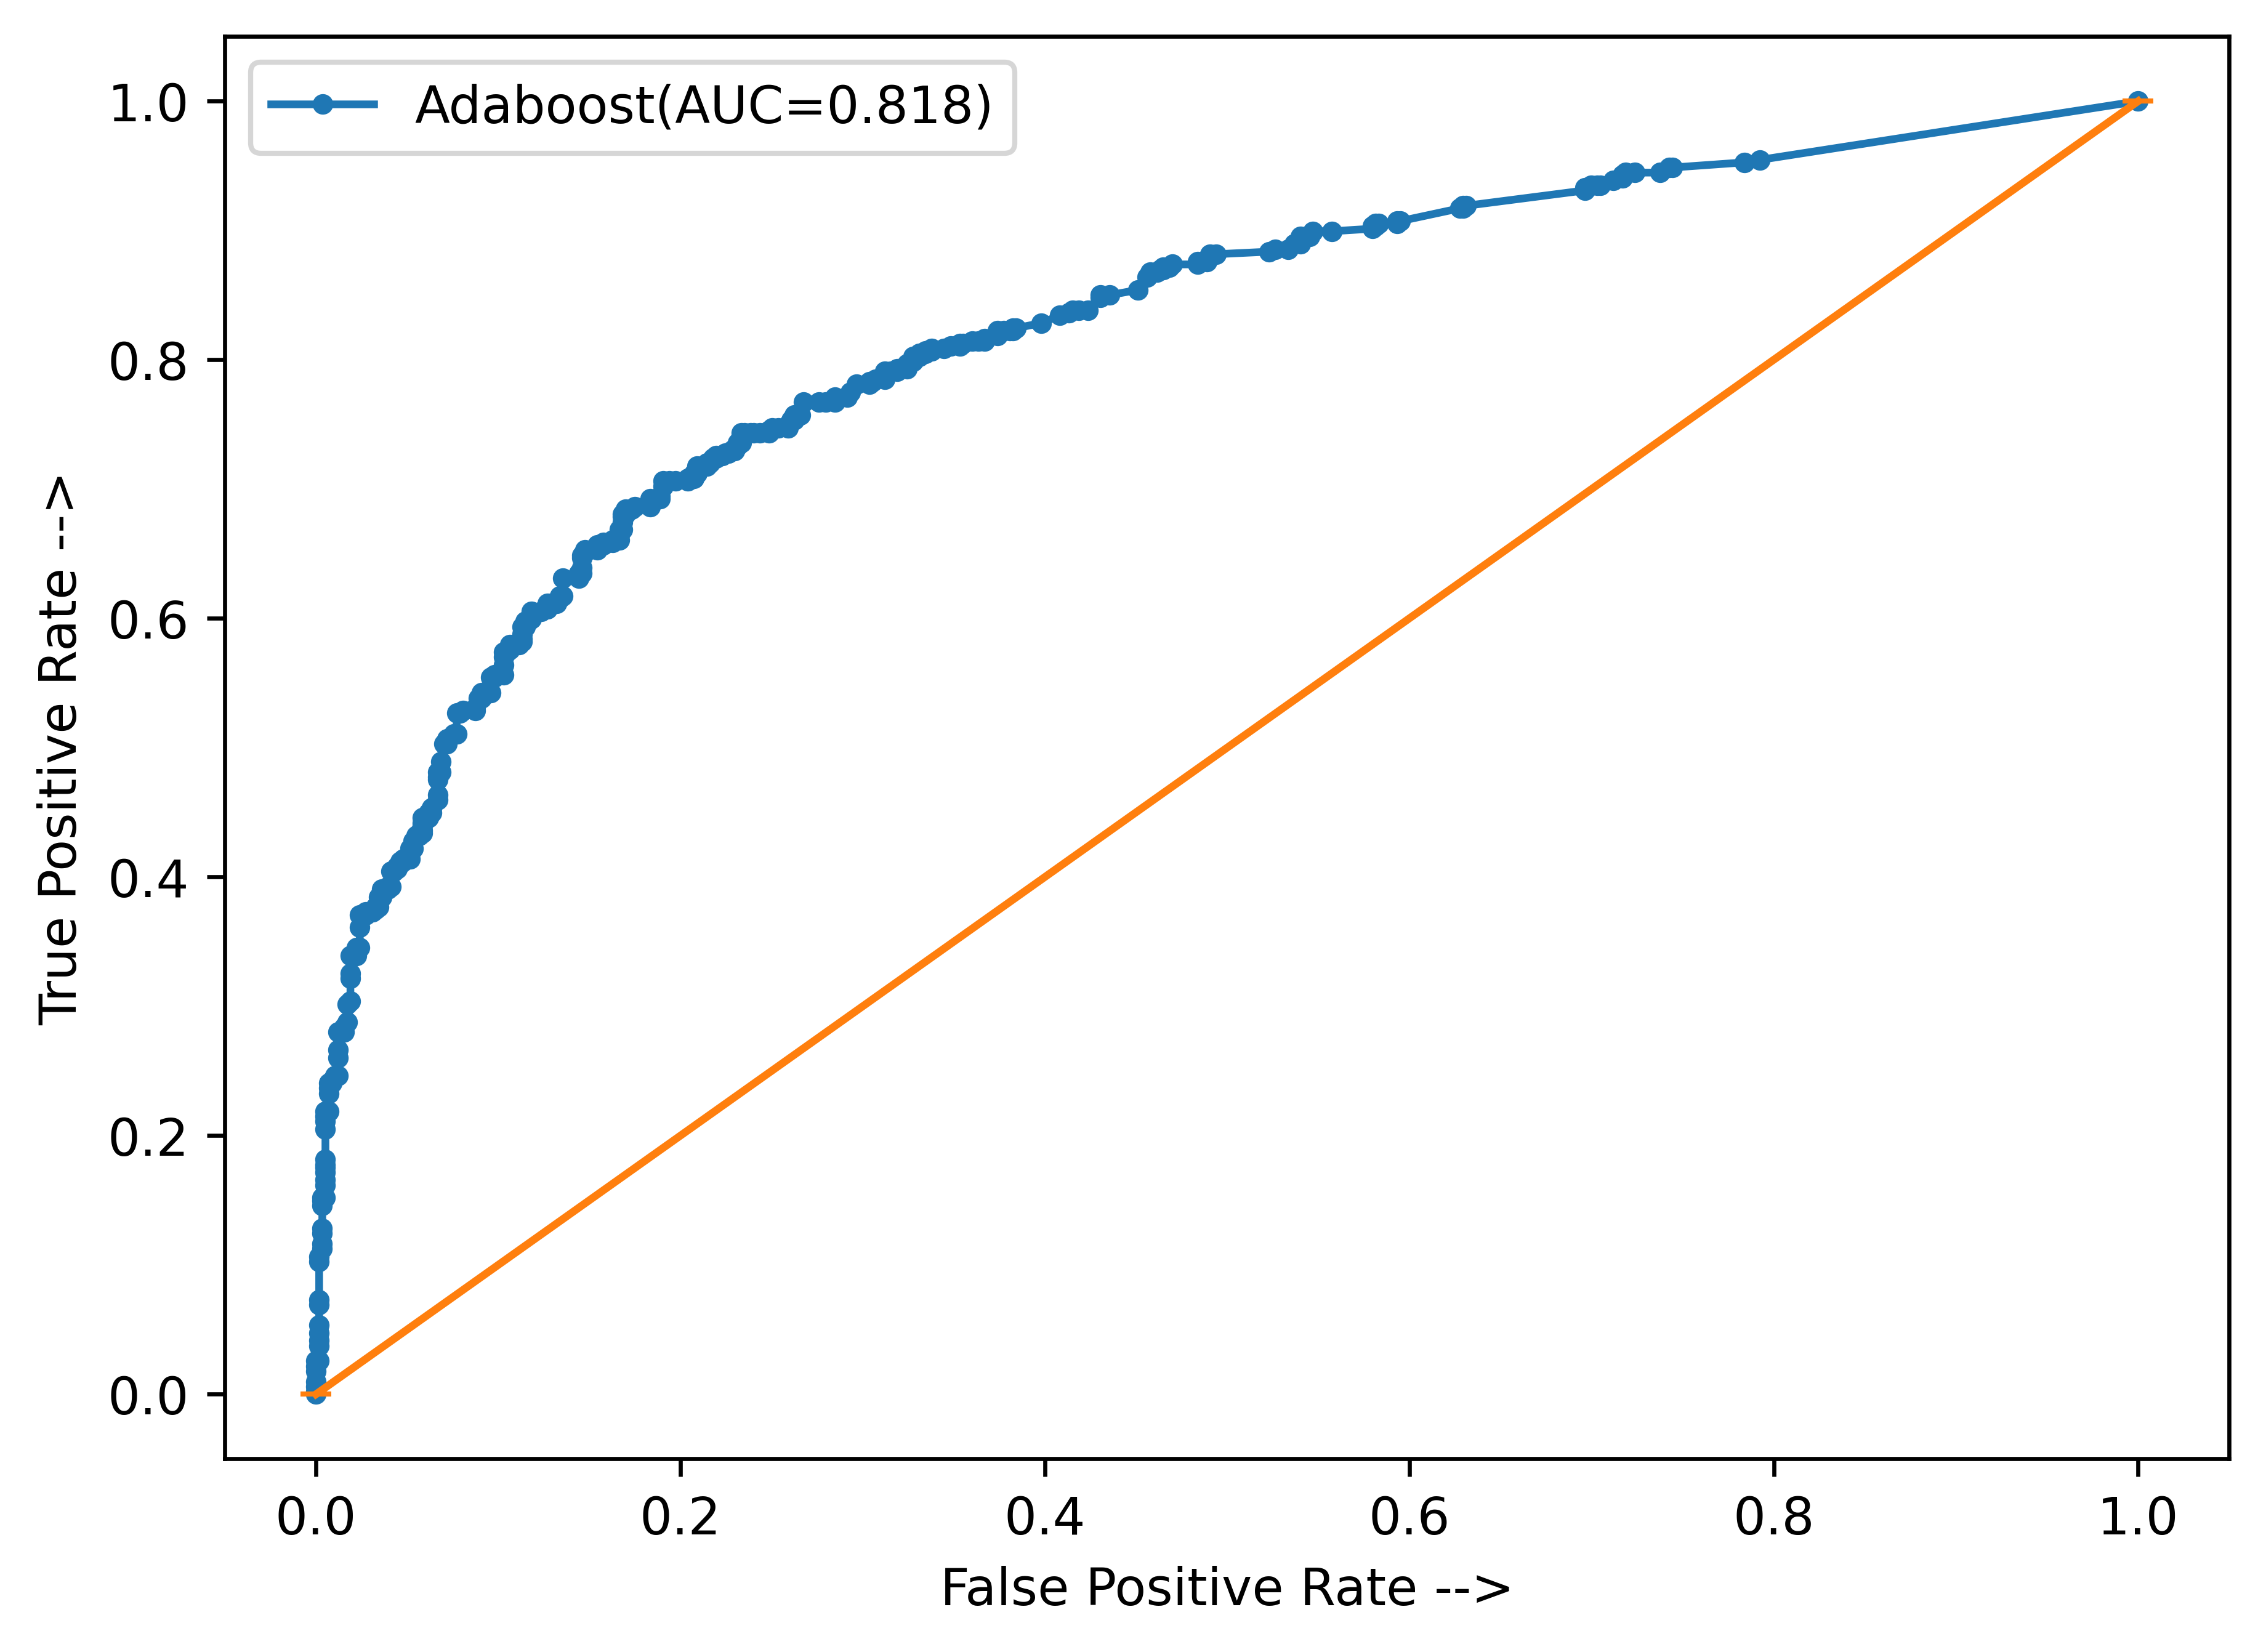

In [22]:
plt.figure(figsize=(7, 5), dpi=600)
plt.plot(fpr, tpr, marker='.', label='Adaboost(AUC=%0.3f)' % r_auc_score)
plt.plot(rfpr, rtpr, marker='_' % r_auc_score_1)
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.savefig('ADA_AUC.png', dpi=600, bbox_inches='tight')
plt.show()

# External

In [25]:
e_test_data = pd.read_excel("external_test_set_486.xlsx")
e_test_data = pd.DataFrame(e_test_data)
e_test_data.shape

(486, 57)

In [26]:
Y_e_test_data = e_test_data.Target
X_e_test_data = e_test_data.drop('Target', axis=1)

In [27]:
e_predictions =adaboost.predict(X_e_test_data)
e_acc_test = adaboost.score(X_e_test_data, Y_e_test_data)*100
print(e_acc_test)

89.30041152263375


In [28]:
# performance metrics to calculate
from sklearn.metrics import matthews_corrcoef
print('Accuracy:%0.3f'% e_acc_test)
tn, fp, fn, tp = confusion_matrix(Y_e_test_data, e_predictions).ravel()
specificity = tn / (tn+fp)
sensitivity = tp / (tp+fn)
print('Sensitivity:%0.3f'% sensitivity)
print('Specificity:%0.3f'% specificity)
ba = 0.5 * (sensitivity + specificity)
print('Balance accuracy:%0.3f'% ba)
mcc = matthews_corrcoef(Y_e_test_data, e_predictions)
print('MCC: %0.3f'% mcc)
bloss = brier_score_loss(Y_e_test_data, e_predictions)
print('Brier_loss: %0.3f' % bloss)
FPR = fp/(fp+tn)
FNR = fn/(tp+fn)
Precision = tp/(tp+fp)
Recall = tp/(tp+fn)
print('False Postive rate: %0.3f' %FPR)
print('False Negative rate: %0.3f' %FNR)
print('Precision: %0.3f' %Precision)
print('Recall: %0.3f' %Recall)
f1=2*((Precision*Recall)/(Precision+Recall))
print('F1: %0.3f' %f1)
kappa = cohen_kappa_score(Y_e_test_data, e_predictions)
print('Kappa: %0.3f' %kappa)

Accuracy:89.300
Sensitivity:0.114
Specificity:0.971
Balance accuracy:0.542
MCC: 0.128
Brier_loss: 0.107
False Postive rate: 0.029
False Negative rate: 0.886
Precision: 0.278
Recall: 0.114
F1: 0.161
Kappa: 0.115


In [29]:
m2= adaboost.predict_proba(X_e_test_data)
m2 = pd.DataFrame(m2)
m2.to_csv("ADA_Probabs.csv")

In [30]:
m2_probs = adaboost.predict_proba(X_e_test_data)
m2_binary = (m2_probs[:, 1] > 0.5).astype(int)
m2_binary_df = pd.DataFrame(m2_binary, columns=['Predicted_Class'])
m2_binary_df.to_csv("ADA_Probabs_Binary.csv", index=False)

In [26]:
import shap
import matplotlib.pyplot as plt

def model_predict(x_train):
    return adaboost.predict(x_train)

masker = shap.maskers.Independent(X_v_test_data)

explainer = shap.Explainer(model_predict, masker)

shap_values = explainer(X_v_test_data)

# Plot and save the SHAP summary plot
shap.summary_plot(shap_values, X_v_test_data, show=False)

# Save the plot to a file
plt.savefig('ADA_shap_summary_plot.png', dpi=300, bbox_inches='tight')
plt.close()

PermutationExplainer explainer: 1091it [7:55:25, 26.17s/it]                                                            


In [27]:
# Convert SHAP values to a DataFrame
shap_values_df = pd.DataFrame(shap_values.values, columns=X_v_test_data.columns)

# Save the SHAP values DataFrame to a CSV file
shap_values_df.to_csv('ADA_shap_values.csv', index=False)